# ACF e PACF

Determinando a autocorrelação e a autocorrelação parcial

Utilizaremos uma série temporal do número de passageiros numa linhas de trem

* Importando biblitecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

* Lendo CSV

In [3]:
dados = pd.read_csv('Passageiros.csv')

* Exibindo cinco primeiras linhas

In [4]:
dados.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


Exinbindo informações da amostra

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


* Removendo coluna ID

In [6]:
dados = dados.drop('ID',axis=1)

* Verificando NaNs

In [7]:
dados.isna().sum()

Datetime    0
Count       0
dtype: int64

* Definindo data como indice

In [8]:
dados['Datetime'] = pd.to_datetime(dados['Datetime'])
dados = dados.set_index('Datetime')

In [9]:
dados.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


* Fazendo reamostragem (Resample)  - quantidade média de passagérios por dia

In [10]:
dados =  dados.resample('D').sum()

In [11]:
dados.head()

,Count
Datetime,
2012-01-09,112
2012-01-10,248
2012-01-11,304
2012-01-12,210
2012-01-13,0


* Removendo NaNs

In [12]:
dados = dados.dropna()

* Graficando série temporal

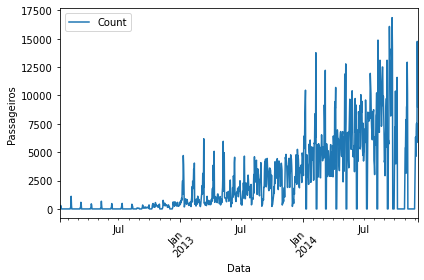

In [13]:
dados.plot()
plt.xticks(rotation=45)
plt.xlabel('Data')
plt.ylabel('Passageiros')
plt.tight_layout()

* Graficando autocorrelação

In [14]:
from statsmodels.graphics.tsaplots import plot_acf

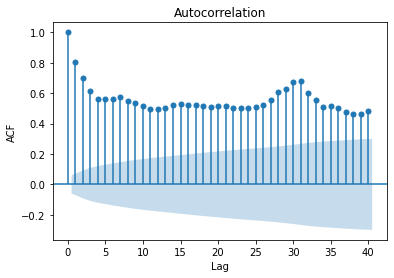

In [15]:
plot_acf(dados.values,lags=40)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

* Alterando range

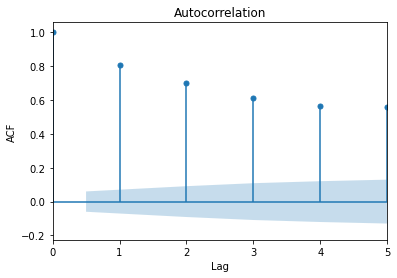

In [16]:
plot_acf(dados.values,lags=10)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.xlim([0,5])
plt.show()

 Encontramos que a lag do ACF tem valor 1

* Graficando autocorrelação parcial

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf

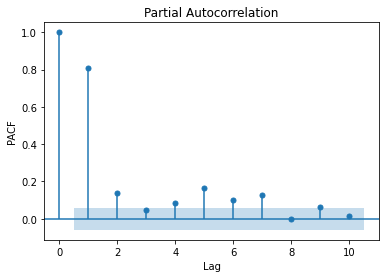

In [18]:
plot_pacf(dados.values,lags=10)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

* Alterando range

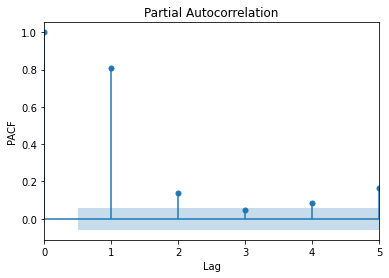

In [19]:
plot_pacf(dados.values,lags=10)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.xlim([0,5])
plt.show()

Encontramos que a PACF tem lag igual a 2

* Lag Plot

In [20]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

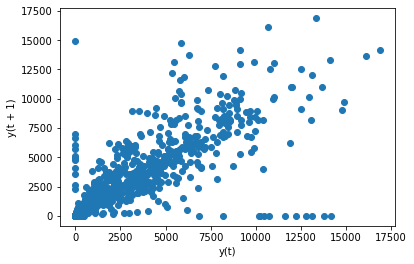

In [21]:
lag_plot(dados)